# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions

- Open the categoricals variable we created before.

categoricals = data.select_dtypes(np.object)

categoricals.head()

- Plot all the categorical variables with the proper plot. What can you see?
- There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
- Plot time variable. Can you extract something from it?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('/Users/felixley/Ironhack/Data_Analytics_Course/Week4/Day1/lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

In [4]:
data.columns = data.columns.str.upper()
data.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data = data.set_index('CUSTOMER')

In [6]:
data['POLICY'] = data['POLICY'].apply(lambda x: x[-2:])
data['RENEW OFFER TYPE'] = data['RENEW OFFER TYPE'].apply(lambda x: x[-1:])

In [7]:
p_type = {'Personal Auto' : 1, 'Corporate Auto' : 2, 'Special Auto' : 3 }
policy = {'L1' : 1, 'L2' : 2, 'L3' : 3}
veh_size = {'Medsize': 2, 'Small' : 1, 'Large' : 3}
coverage = {'Basic' : 1, 'Extended' : 2, 'Premium' : 3}
education = {'Bachelor' : 3, 'College' : 2, 'Master' : 4, 'High School or Below' :1, 'Doctor' : 5}

data['POLICY'] = data['POLICY'].replace(policy)
data['POLICY TYPE'] = data['POLICY TYPE'].replace(p_type)
data['VEHICLE SIZE'] = data['VEHICLE SIZE'].replace(veh_size)
data['COVERAGE'] = data['COVERAGE'].replace(coverage)
data['EDUCATION'] = data['EDUCATION'].replace(education)

In [8]:
data['RENEW OFFER TYPE'] = data['RENEW OFFER TYPE'].astype(int)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   STATE                          9134 non-null   object        
 1   CUSTOMER LIFETIME VALUE        9134 non-null   float64       
 2   RESPONSE                       9134 non-null   object        
 3   COVERAGE                       9134 non-null   int64         
 4   EDUCATION                      9134 non-null   int64         
 5   EFFECTIVE TO DATE              9134 non-null   datetime64[ns]
 6   EMPLOYMENTSTATUS               9134 non-null   object        
 7   GENDER                         9134 non-null   object        
 8   INCOME                         9134 non-null   int64         
 9   LOCATION CODE                  9134 non-null   object        
 10  MARITAL STATUS                 9134 non-null   object        
 11  MONTHLY PREMI

In [10]:
data.head()

,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,LOCATION CODE,...,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE
CUSTOMER,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,1,3,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,2,3,1,Agent,384.811147,Two-Door Car,2
QZ44356,Arizona,6979.535903,No,2,3,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,1,3,3,Agent,1131.464935,Four-Door Car,2
AI49188,Nevada,12887.431650,No,3,3,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,1,3,1,Agent,566.472247,Two-Door Car,2
WW63253,California,7645.861827,No,1,3,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,2,2,1,Call Center,529.881344,SUV,2
HB64268,Washington,2813.692575,No,1,3,2011-02-03,Employed,M,43836,Rural,...,44,0,1,1,1,1,Agent,138.130879,Four-Door Car,2


In [25]:
data.isin([' ', '0', 0, '', np.nan]).sum()

STATE                               0
CUSTOMER LIFETIME VALUE             0
RESPONSE                            0
COVERAGE                            0
EDUCATION                           0
EFFECTIVE TO DATE                   0
EMPLOYMENTSTATUS                    0
GENDER                              0
INCOME                           2317
LOCATION CODE                       0
MARITAL STATUS                      0
MONTHLY PREMIUM AUTO                0
MONTHS SINCE LAST CLAIM           314
MONTHS SINCE POLICY INCEPTION      83
NUMBER OF OPEN COMPLAINTS        7252
NUMBER OF POLICIES                  0
POLICY TYPE                         0
POLICY                              0
RENEW OFFER TYPE                    0
SALES CHANNEL                       0
TOTAL CLAIM AMOUNT                  0
VEHICLE CLASS                       0
VEHICLE SIZE                        0
dtype: int64

In [11]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)

In [12]:
for i in categoricals:
    print(i, categoricals[i].unique())

STATE ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
RESPONSE ['No' 'Yes']
EMPLOYMENTSTATUS ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
GENDER ['F' 'M']
LOCATION CODE ['Suburban' 'Rural' 'Urban']
MARITAL STATUS ['Married' 'Single' 'Divorced']
SALES CHANNEL ['Agent' 'Call Center' 'Web' 'Branch']
VEHICLE CLASS ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


In [13]:
for i in categoricals:
    print(i, categoricals[i].isin(['', ' ', '0']).sum())

STATE 0
RESPONSE 0
EMPLOYMENTSTATUS 0
GENDER 0
LOCATION CODE 0
MARITAL STATUS 0
SALES CHANNEL 0
VEHICLE CLASS 0


In [14]:
categoricals['STATE'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: STATE, dtype: int64

In [15]:
# Plotting the categoricals

In [16]:
def countplot(x):
    for i in x.columns:
        sns.countplot(x=i, data=x)
        plt.show()


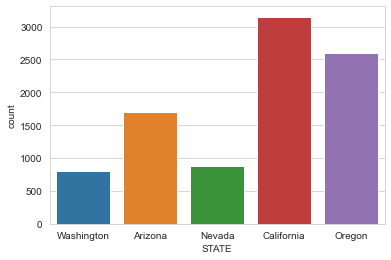

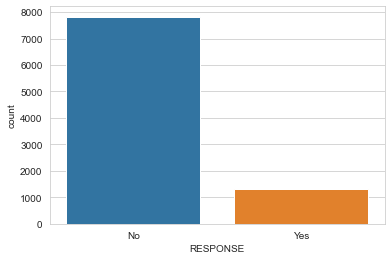

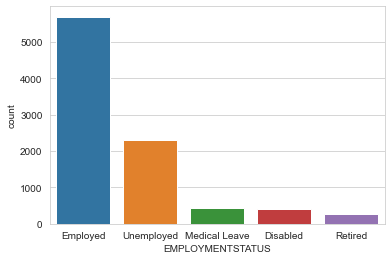

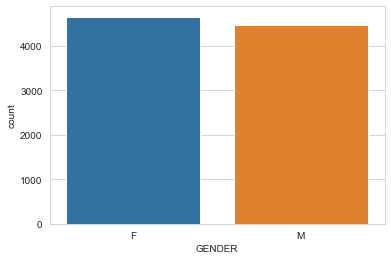

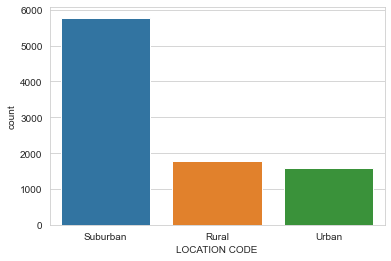

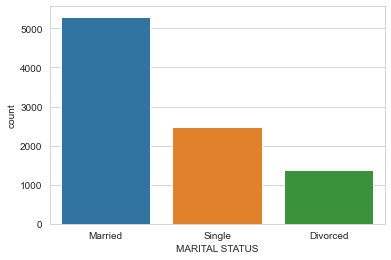

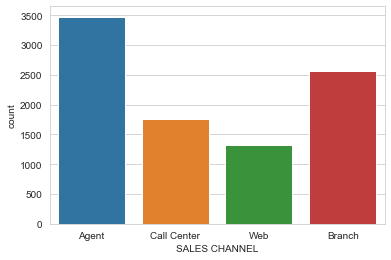

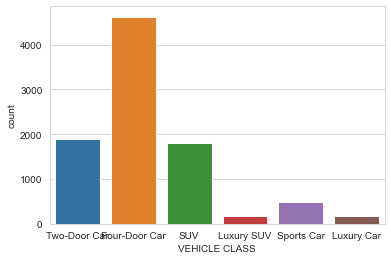

In [17]:
countplot(categoricals)

We should identify the ordinals and replace the values or get dummies for them.

In [18]:
numericals

,CUSTOMER LIFETIME VALUE,COVERAGE,EDUCATION,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,TOTAL CLAIM AMOUNT,VEHICLE SIZE
CUSTOMER,,,,,,,,,,,,,,
BU79786,2763.519279,1,3,56274,69,32,5,0,1,2,3,1,384.811147,2
QZ44356,6979.535903,2,3,0,94,13,42,0,8,1,3,3,1131.464935,2
AI49188,12887.431650,3,3,48767,108,18,38,0,2,1,3,1,566.472247,2
WW63253,7645.861827,1,3,0,106,18,65,0,7,2,2,1,529.881344,2
HB64268,2813.692575,1,3,43836,73,12,44,0,1,1,1,1,138.130879,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,1,3,71941,73,18,89,0,2,1,1,2,198.234764,2
PK87824,3096.511217,2,2,21604,79,14,28,0,1,2,3,1,379.200000,2
TD14365,8163.890428,2,3,0,85,9,37,3,2,2,2,1,790.784983,2


<function matplotlib.pyplot.show(close=None, block=None)>

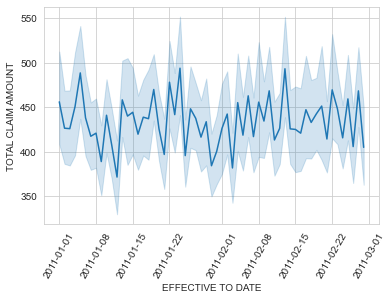

In [19]:
sns.lineplot(x = 'EFFECTIVE TO DATE', y = 'TOTAL CLAIM AMOUNT', data = data) 
plt.xticks(rotation=60)
plt.show

In [20]:
numericals

,CUSTOMER LIFETIME VALUE,COVERAGE,EDUCATION,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,TOTAL CLAIM AMOUNT,VEHICLE SIZE
CUSTOMER,,,,,,,,,,,,,,
BU79786,2763.519279,1,3,56274,69,32,5,0,1,2,3,1,384.811147,2
QZ44356,6979.535903,2,3,0,94,13,42,0,8,1,3,3,1131.464935,2
AI49188,12887.431650,3,3,48767,108,18,38,0,2,1,3,1,566.472247,2
WW63253,7645.861827,1,3,0,106,18,65,0,7,2,2,1,529.881344,2
HB64268,2813.692575,1,3,43836,73,12,44,0,1,1,1,1,138.130879,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,1,3,71941,73,18,89,0,2,1,1,2,198.234764,2
PK87824,3096.511217,2,2,21604,79,14,28,0,1,2,3,1,379.200000,2
TD14365,8163.890428,2,3,0,85,9,37,3,2,2,2,1,790.784983,2
